# RANDOM FOREST

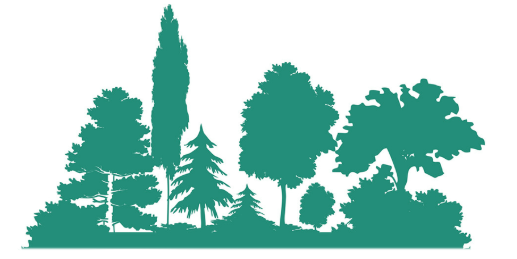

Random forest adalah salah satu terapan dari ensemble learning. Pada dasarnya ensemble learning adalah gabungan dari beberapa metode machine learning atau yang biasa disebut base learners. Hasil klasifikasi dari ensemble learning adalah berupa hard voting atau soft voting . Random forest menggunakan Decision Tree sebagai base learner.


Pada Random Forest, kita menggunakan teknik Bagging. Bagging berfungsi untuk memisahkan dataset menjadi data-data sample. Kemudian di tiap-tiap data sample tersebut akan menjadi data training untuk model decision tree. Hasil output dari Random Forest adalah berupa hard voting dari model-model  Decision Tree


Misalkan, dari sebuah dataset terdapat 10 fitur yang akan kita olah. kita akan membuat Random Forest yang terdiri dari 3 Decision Tree. Decision Tree akan mempelajari sebuah data yang diambil dari subset hasil teknik bagging.

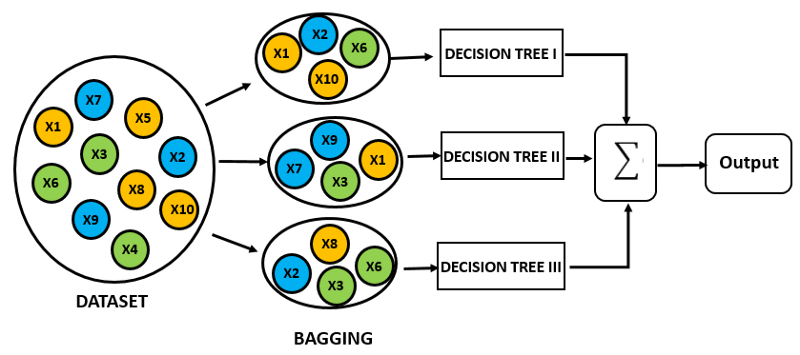

Kelebihan
1. Mampu mengatasi masalah overfitting
2. Mampu menganalisa fitur yang paling penting dalam menentukan model
3. Performa yang cukup bagus dalam mengatasi non-linear problem

Kekurangan
1. Memakan waktu yang lama dalam komputasi
2. Sulit untuk diinterpretasikan
3. Harus menentukan jumlah pohon agar model bisa berjalan maksimal.



# CODING SECTION
 
# Use Case

Sebuah perusahaan mobil berinisial AVZ ingin mendongkrak penjualan mereka untuk tahun 2019. Sebagai Data Scientist, kita diberikan dataset laporan hasil iklan mobil yang berisi dengan fitur ID, umur, gaji, dan record pembelian. Diharapkan kita mampu memberikan insight untuk meningkatkan kemungkinan customer akan membeli mobil tersebut atau tidak.

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing dataset
df = pd.read_csv('data_iklan.csv')

In [3]:
df.head(10)

,ID,Gender,Umur,Gaji,Pembelian
0,15624510,Pria,19,9,0
1,15810944,Pria,35,10,0
2,15668575,Wanita,26,21,0
3,15603246,Wanita,27,28,0
4,15804002,Pria,19,38,0
5,15728773,Pria,27,29,0
6,15598044,Wanita,27,42,0
7,15694829,Wanita,32,75,1
8,15600575,Pria,25,16,0
9,15727311,Wanita,35,32,0


In [7]:
# memisahkan dataset ke training dan test data
X = df.iloc[:, [2, 3]].values
y = df.iloc[:, 4].values


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [8]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [20]:
# Fitting Random Forest to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=300)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)


In [21]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
cm

array([[64,  4],
       [ 3, 29]], dtype=int64)

In [22]:
accuracy_score(y_test, y_pred)

0.93

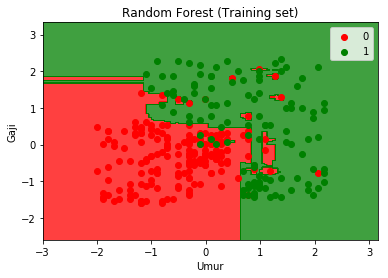

In [23]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest (Training set)')
plt.xlabel('Umur')
plt.ylabel('Gaji')
plt.legend()
plt.show()

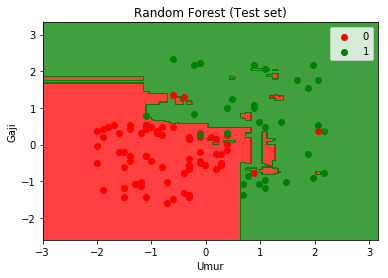

In [24]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest (Test set)')
plt.xlabel('Umur')
plt.ylabel('Gaji')
plt.legend()
plt.show()

# KESIMPULAN

Random Forest secara general lebih baik dari Decision Tree, terlebih lagi dalam hal menangani overfitting. Namun, metode ini sulit untuk diinterpretasikan, karena dalam teknik baggingnya bersifat blackbox, sama halnya dalam mengatur parameter Decision Tree. Random Forest bisa diaplikasikan pada finance, farmasi, e-commerce, dan stock market.